In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1search_results_Climate Change.csv')
df

,user_country,source,content,date
0,NaN,Twitter for Android,Lefty friends if you see this RT with #Climate...,2020-09-29T23:59:59+00:00
1,NaN,Twitter Web App,@AndrewLoveUS @johnlegend who lectures us abo...,2020-09-29T23:59:52+00:00
2,"Toronto, Canada",Twitter for Android,@GetRealNS @nationalpost I'm extremely doubtfu...,2020-09-29T23:59:42+00:00
3,"San Diego, CA",Twitter for iPad,"Shalom and MHNCB, Truth Be Told will be stream...",2020-09-29T23:59:41+00:00
4,"Washington, USA",Twitter Web App,@JStein_WaPo how to address climate change sys...,2020-09-29T23:59:33+00:00
...,...,...,...,...
1995,North America,TweetDeck,""" Extinction is forever – so our action must b...",2020-09-29T21:36:00+00:00
1996,"Los Angeles, CA",Tweetbot for iΟS,Tfw your zoom meeting on climate change data g...,2020-09-29T21:35:56+00:00
1997,California,Twitter Web App,@nbcbayarea Interesting that the reaction to t...,2020-09-29T21:35:55+00:00
1998,"Englewood, CO",Twitter Web App,@elephanteye00 @SenKamalaHarris Those firebugs...,2020-09-29T21:35:52+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

64199
['lefty', 'friends', 'if', 'you', 'see', 'this', 'rt', 'with', '#climatechange', '👍', '🏼', '@marcusjamescage', '@marisaozbat', '@marzelyse', '@masktchi', '@masmarco02', '@mathemattic', '@mattcgreene', '@mauigirl8888', '@mcauleyatl']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 190.92%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

28647
['lefty', 'friends', 'see', 'lectures', 'climate', 'change', 'square', 'foot', 'home', 'original', 'thoughts', 'cool', 'hate', 'also', 'cool', 'live', 'home', 'footage', 'mini-mall', 'lecture']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@ilhan', 80),
 ('@joebiden', 38),
 ('@realdonaldtrump', 32),
 ('@youtube', 16),
 ('@abc', 14),
 ('@costareports', 11),
 ('@elizabetharush', 10),
 ('@rbreich', 9),
 ('@cnn', 8),
 ('@angie53070613', 8),
 ('@nytimes', 7),
 ('@', 7),
 ('@appstate', 7),
 ('@aoc', 7),
 ('@dawntj90', 7),
 ('@ewarren', 7),
 ('@erinotoole', 6),
 ('@un', 6),
 ('@reuters', 6),
 ('@kamalaharris', 6)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,NaN,Twitter for Android,Lefty friends if you see this RT with #Climate...,2020-09-29T23:59:59+00:00,Neutral
1,NaN,Twitter Web App,@AndrewLoveUS @johnlegend who lectures us abo...,2020-09-29T23:59:52+00:00,Positive
2,"Toronto, Canada",Twitter for Android,@GetRealNS @nationalpost I'm extremely doubtfu...,2020-09-29T23:59:42+00:00,Positive
3,"San Diego, CA",Twitter for iPad,"Shalom and MHNCB, Truth Be Told will be stream...",2020-09-29T23:59:41+00:00,Positive
4,"Washington, USA",Twitter Web App,@JStein_WaPo how to address climate change sys...,2020-09-29T23:59:33+00:00,Positive
...,...,...,...,...,...
1995,North America,TweetDeck,""" Extinction is forever – so our action must b...",2020-09-29T21:36:00+00:00,Positive
1996,"Los Angeles, CA",Tweetbot for iΟS,Tfw your zoom meeting on climate change data g...,2020-09-29T21:35:56+00:00,Neutral
1997,California,Twitter Web App,@nbcbayarea Interesting that the reaction to t...,2020-09-29T21:35:55+00:00,Positive
1998,"Englewood, CO",Twitter Web App,@elephanteye00 @SenKamalaHarris Those firebugs...,2020-09-29T21:35:52+00:00,Positive


In [11]:
df.sentiment.value_counts()

Positive    922
Neutral     555
Negative    523
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 46.10%
Percentage of neutral tweets: 27.75%
Percentage of negative tweets: 26.15%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

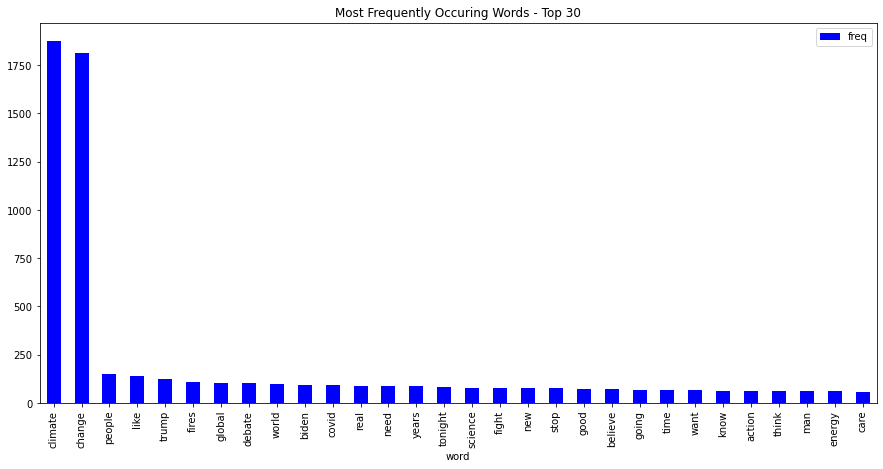

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Biden-Debate1')

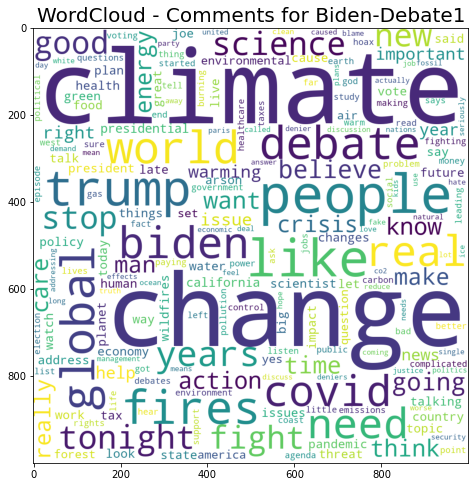

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Biden-Debate1", fontsize = 20)

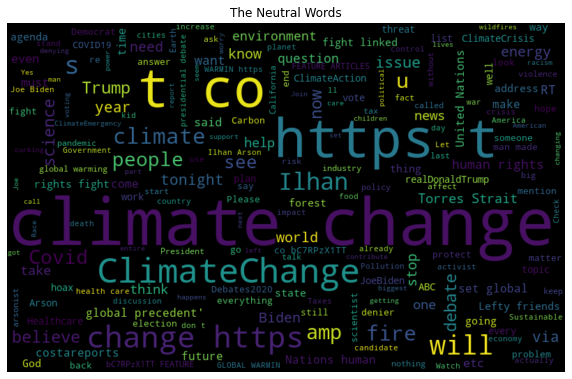

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

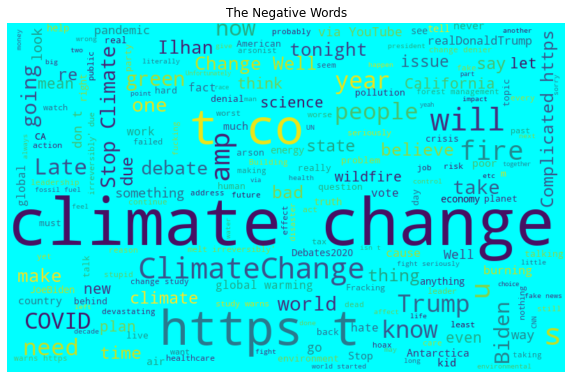

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

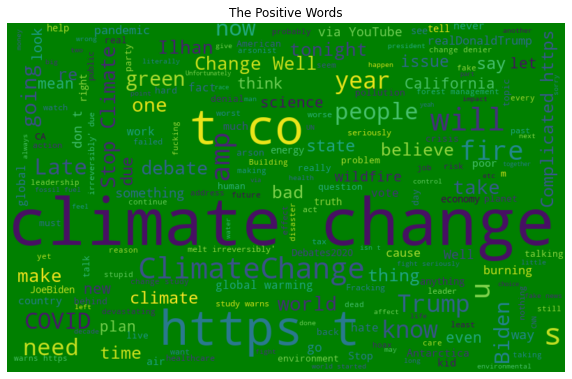

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,Lefty friends if you see this RT with #Climate...,Neutral
1,@AndrewLoveUS @johnlegend who lectures us abo...,Positive
2,@GetRealNS @nationalpost I'm extremely doubtfu...,Positive
3,"Shalom and MHNCB, Truth Be Told will be stream...",Positive
4,@JStein_WaPo how to address climate change sys...,Positive
...,...,...
1995,""" Extinction is forever – so our action must b...",Positive
1996,Tfw your zoom meeting on climate change data g...,Neutral
1997,@nbcbayarea Interesting that the reaction to t...,Positive
1998,@elephanteye00 @SenKamalaHarris Those firebugs...,Positive


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Neutral,lefty friends if you see this rt with climatec...
1,Positive,who lectures us about climate change from his ...
2,Positive,i m extremely doubtful that we ll do much more...
3,Positive,shalom and mhncb truth be told will be streami...
4,Positive,wapo how to address climate change systemic ra...
...,...,...
1995,Positive,extinction is forever so our action must be im...
1996,Neutral,tfw your zoom meeting on climate change data g...
1997,Positive,interesting that the reaction to this announce...
1998,Positive,those firebugs sure are busy on every continen...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
1,Positive,who lectures us about climate change from his ...
2,Positive,i m extremely doubtful that we ll do much more...
3,Positive,shalom and mhncb truth be told will be streami...
4,Positive,wapo how to address climate change systemic ra...
5,Positive,from what i ve seen of a lot climate change wh...
...,...,...
1972,Negative,is it too late to stop climate change well it ...
1977,Negative,ahead of tonight s leadersdebate and next week...
1987,Negative,let them play about azerbaijan and armania fig...
1988,Negative,talking only about climate change already lost...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
1,1,who lectures us about climate change from his ...
2,1,i m extremely doubtful that we ll do much more...
3,1,shalom and mhncb truth be told will be streami...
4,1,wapo how to address climate change systemic ra...
5,1,from what i ve seen of a lot climate change wh...
...,...,...
1972,0,is it too late to stop climate change well it ...
1977,0,ahead of tonight s leadersdebate and next week...
1987,0,let them play about azerbaijan and armania fig...
1988,0,talking only about climate change already lost...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(1083, 2)
(362, 2)


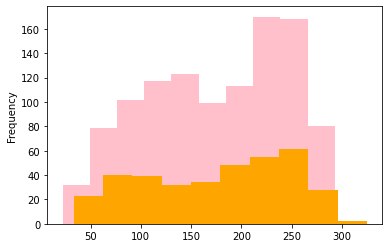

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(432291, 656380)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('biden', 0.7582905292510986),
 ('hunter', 0.7195981740951538),
 ('lies', 0.7172538638114929),
 ('returns', 0.6959852576255798),
 ('epa', 0.6908226013183594),
 ('civil', 0.6895015835762024),
 ('except', 0.6753216981887817),
 ('donald', 0.6735318899154663),
 ('him', 0.669032096862793),
 ('thinks', 0.6607502102851868)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('no', -0.2986968755722046),
 ('water', -0.3015940189361572),
 ('food', -0.30231761932373047),
 ('gas', -0.302442729473114),
 ('at', -0.3077196478843689),
 ('global', -0.3096863925457001),
 ('pollution', -0.31171101331710815),
 ('has', -0.31657588481903076),
 ('ocean', -0.31782281398773193),
 ('health', -0.32557615637779236)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(1083, 500)
(1083,)
(362, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.42265193370165743
F1 score : 0.4396782841823056
[[ 71  65]
 [144  82]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9944598337950139
Validation Accuracy : 0.42265193370165743
f1 score : 0.4571428571428571
[[ 65  71]
 [138  88]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.4585635359116022
f1 score : 0.41666666666666663
[[ 96  40]
 [156  70]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9178208679593721
Validation Accuracy : 0.5966850828729282
f1 score : 0.7438596491228071
[[  4 132]
 [ 14 212]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 if you cared about your kids future you would not elect an out an out climate change denier who keeps on lowering environmental standards his turnover of staff is mind boggling 

First sample after preprocessing: 
 [ 36  17  20  43 314 178  17  50  23  53  73  53  73   2   3 293  65  15
 198  80   6   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
8/8 - 2s - loss: 0.6647 - accuracy: 0.6150 - val_loss: 0.6432 - val_accuracy: 0.6514
Epoch 2/20
8/8 - 1s - loss: 0.6538 - accuracy: 0.6417 - val_loss: 0.6417 - val_accuracy: 0.6514
Epoch 3/20
8/8 - 2s - loss: 0.6442 - accuracy: 0.6417 - val_loss: 0.6404 - val_accuracy: 0.6514
Epoch 4/20
8/8 - 2s - loss: 0.6348 - accuracy: 0.6417 - val_loss: 0.6263 - val_accuracy: 0.6514
Epoch 5/20
8/8 - 2s - loss: 0.6192 - accuracy: 0.6417 - val_loss: 0.6102 - val_accuracy: 0.6514
Epoch 6/20
8/8 - 1s - loss: 0.5928 - accuracy: 0.6417 - val_loss: 0.5848 - val_accuracy: 0.6697
Epoch 7/20
8/8 - 1s - loss: 0.5479 - accuracy: 0.6817 - val_loss: 0.5505 - val_accuracy: 0.6789
Epoch 8/20
8/8 - 1s - loss: 0.4900 - accuracy: 0.7659 - val_loss: 0.5209 - val_accuracy: 0.7523
Epoch 9/20
8/8 - 2s - loss: 0.4289 - accuracy: 0.8306 - val_loss: 0.5143 - val_accuracy: 0.7706
Epoch 10/20
8/8 - 2s - loss: 0.3634 - accuracy: 0.8696 - val_loss: 0.5516 - val_accuracy: 0.7798
Epoch 11/20
8/8 - 2s - loss: 0.3027 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,-1,lefty friends if you see this rt with climatec...
1,1,who lectures us about climate change from his ...
2,1,i m extremely doubtful that we ll do much more...
3,1,shalom and mhncb truth be told will be streami...
4,1,wapo how to address climate change systemic ra...
...,...,...
1995,1,extinction is forever so our action must be im...
1996,-1,tfw your zoom meeting on climate change data g...
1997,1,interesting that the reaction to this announce...
1998,1,those firebugs sure are busy on every continen...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.52
F1 score : [0.55704698 0.15662651 0.6119403 ]
[[ 83   2  55]
 [ 30  13  99]
 [ 45   9 164]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9073333333333333
Validation Accuracy : 0.452
f1 score : [0.16       0.12269939 0.6102719 ]
[[ 14   7 119]
 [  9  10 123]
 [ 12   4 202]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.4
f1 score : [0.44221106 0.21800948 0.45524297]
[[ 88  19  33]
 [ 68  23  51]
 [102  27  89]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8373333333333334
Validation Accuracy : 0.516
f1 score : [0.51476793 0.01398601 0.63225806]
[[ 61   0  79]
 [ 14   1 127]
 [ 22   0 196]]


In [59]:
X_Train

array([[1, 0, 1, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 3, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['i wrote a thing about wealthy people and climate action over on linkedin it is clever but you don t need to read it you should though climatechange richierich', 'boos came after a mention of the climate change focused green new deal which pence decried', 'sc sc are a match made in heaven maybe hell climate change denial blindly loyal to trump disastrous healthcare platforms', 'sounds like jim baker is now a democrat conservatives don t believe in free trade climate change balanced budgets smaller government deadlinewh', 'we deserve a president that will out line his plans for the future don t fall into the trump traps just tell him you are not going dignify his crazy f n points with an answer then proceed to tell us your plans for income equality climate change race relations etc', 'brazil revokes mangrove protections weakening another ecosystem key to curbing climate change read more adaptation antarctica arctic carbondioxide climateaction climat

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.5901 - accuracy: 0.2696 - val_loss: 0.4580 - val_accuracy: 0.3200
Epoch 2/20
11/11 - 2s - loss: 0.5106 - accuracy: 0.2467 - val_loss: 0.4443 - val_accuracy: 0.3200
Epoch 3/20
11/11 - 2s - loss: 0.4838 - accuracy: 0.2467 - val_loss: 0.4524 - val_accuracy: 0.3200
Epoch 4/20
11/11 - 2s - loss: 0.4602 - accuracy: 0.2467 - val_loss: 0.4078 - val_accuracy: 0.3200
Epoch 5/20
11/11 - 2s - loss: 0.3975 - accuracy: 0.2467 - val_loss: 0.3409 - val_accuracy: 0.3200
Epoch 6/20
11/11 - 2s - loss: 0.1897 - accuracy: 0.2467 - val_loss: 0.1829 - val_accuracy: 0.3200
Epoch 7/20
11/11 - 2s - loss: -2.7224e-01 - accuracy: 0.2800 - val_loss: -2.6476e-01 - val_accuracy: 0.4467
Epoch 8/20
11/11 - 2s - loss: -1.2720e+00 - accuracy: 0.3993 - val_loss: -9.8184e-01 - val_accuracy: 0.4600
Epoch 9/20
11/11 - 3s - loss: -3.4743e+00 - accuracy: 0.4133 - val_loss: -2.4207e+00 - val_accuracy: 0.4467
Epoch 10/20
11/11 - 3s - loss: -7.9828e+00 - accuracy: 0.4311 - val_loss: -5.5515e+00 - 